In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets,svm,metrics,cross_validation
import matplotlib.pyplot as plt

E:\anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
iris = datasets.load_iris()

In [4]:
iris.DESCR

'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ============

In [5]:
X= iris.data[: , :2]
Y=iris.target

In [6]:
svc = svm.SVC(kernel ='rbf',C=1000,gamma=0.1)
svc.fit(X,Y)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
x1_min , x2_min = X[:, 0].min() - 1, X[:, 1].min() - 1
print(x1_min , x2_min)

3.3 1.0


In [8]:
x1_max , x2_max = X[:, 0].max() + 1, X[:, 1].max() + 1
print(x1_max , x2_max)

8.9 5.4


In [9]:
h1=(x1_max -x1_min)/100
h2=(x2_max -x2_min)/100
x1 = np.arange(x1_min , x1_max,h1)
x2= np.arange(x2_min, x2_max,h2)
print(x1,x2)

[ 3.3    3.356  3.412  3.468  3.524  3.58   3.636  3.692  3.748  3.804
  3.86   3.916  3.972  4.028  4.084  4.14   4.196  4.252  4.308  4.364
  4.42   4.476  4.532  4.588  4.644  4.7    4.756  4.812  4.868  4.924
  4.98   5.036  5.092  5.148  5.204  5.26   5.316  5.372  5.428  5.484
  5.54   5.596  5.652  5.708  5.764  5.82   5.876  5.932  5.988  6.044  6.1
  6.156  6.212  6.268  6.324  6.38   6.436  6.492  6.548  6.604  6.66
  6.716  6.772  6.828  6.884  6.94   6.996  7.052  7.108  7.164  7.22
  7.276  7.332  7.388  7.444  7.5    7.556  7.612  7.668  7.724  7.78
  7.836  7.892  7.948  8.004  8.06   8.116  8.172  8.228  8.284  8.34
  8.396  8.452  8.508  8.564  8.62   8.676  8.732  8.788  8.844] [ 1.     1.044  1.088  1.132  1.176  1.22   1.264  1.308  1.352  1.396
  1.44   1.484  1.528  1.572  1.616  1.66   1.704  1.748  1.792  1.836
  1.88   1.924  1.968  2.012  2.056  2.1    2.144  2.188  2.232  2.276
  2.32   2.364  2.408  2.452  2.496  2.54   2.584  2.628  2.672  2.716
  2.76   2.

In [10]:
xx,yy = np.meshgrid(x1,x2)
print(xx)
xx.shape
xx.ravel().shape
points = np.c_[xx.ravel(),yy.ravel()]


[[ 3.3    3.356  3.412 ...,  8.732  8.788  8.844]
 [ 3.3    3.356  3.412 ...,  8.732  8.788  8.844]
 [ 3.3    3.356  3.412 ...,  8.732  8.788  8.844]
 ..., 
 [ 3.3    3.356  3.412 ...,  8.732  8.788  8.844]
 [ 3.3    3.356  3.412 ...,  8.732  8.788  8.844]
 [ 3.3    3.356  3.412 ...,  8.732  8.788  8.844]]


In [11]:
pred = svc.predict(points)

#bringing z(pred) to the shape of xx,yy
pred = pred.reshape(xx.shape)

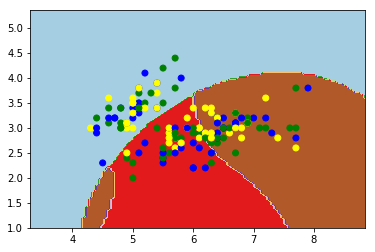

In [12]:
plt.contourf(xx,yy,pred,cmap=plt.cm.Paired,alpha=1)
plt.scatter(X[:,0],X[:,1],c=['green','yellow','blue'])
plt.show()

In [16]:
#do the same for rbf,linear kernel
clf1= svm.SVC(kernel = 'rbf', C =1,gamma =.1)
clf1.fit(X,Y)
y_pred1 = clf1.predict(X)
clf1.score(X,Y)

0.81999999999999995

In [17]:
clf1= svm.SVC(kernel = 'linear', C =1,gamma =.1)
clf1.fit(X,Y)
y_pred1 = clf1.predict(X)
clf1.score(X,Y)

0.81999999999999995